In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [35]:
df_hw1 = pd.read_csv('HW1.csv')
df_hw1

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,0.0294,167.060,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0.0498,105.256,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,0.0792,123.881,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,0.1070,122.444,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,0.0313,172.011,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...
15812,78,245493,0.225000,0.600,0.663,0.000000,3,0.1190,-5.802,0.0477,121.070,0.286
15813,61,241693,0.634000,0.566,0.664,0.000000,4,0.1160,-5.303,0.0464,128.945,0.437
15814,48,213053,0.603000,0.679,0.540,0.000017,0,0.0905,-7.457,0.0260,81.971,0.449
15815,62,205048,0.037100,0.665,0.709,0.000000,11,0.3230,-3.643,0.0370,100.001,0.841


In [36]:
df_hw1_train = df_hw1.iloc[:10000]
df_hw1_test = df_hw1.iloc[10000:]
df_hw1_train

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,0.0294,167.060,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0.0498,105.256,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,0.0792,123.881,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,0.1070,122.444,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,0.0313,172.011,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,71,156591,0.617000,0.818,0.412,0.000000,10,0.2540,-6.007,0.1090,115.348,0.866
9996,60,213440,0.288000,0.726,0.566,0.000000,4,0.3520,-4.500,0.0288,99.821,0.908
9997,77,148561,0.028500,0.694,0.414,0.009920,7,0.5350,-12.117,0.0401,125.069,0.941
9998,65,243726,0.553000,0.646,0.510,0.000006,10,0.0824,-6.450,0.0416,118.608,0.937


In [37]:
class LinearRegressionHW:
    def __init__(self , M : int , s :float) -> None:
        self.M = M
        self.s = s
        self.weight : np.ndarray = None
        
    @staticmethod
    def logistic_function(x:np.ndarray) -> np.array:
        return 1 / (1 + np.exp(-x))

    
    def basis_function(self , x : np.ndarray , j : int) -> np.array:
        if j == 0:
            return np.ones(len(x))
        
        u = np.full(len(x) , (3*j)/self.M)
        x -= u 
        x /= self.s
        
        x = LinearRegressionHW.logistic_function(x)
        return x
    
    def build_design_matrix(self , x : np.ndarray) -> np.ndarray:
        design_matrix_T = [self.basis_function(x=x , j=j) for j in range(self.M)]
        
        return np.array(design_matrix_T).T
    
    def build_large_design_matrix(self , x_data : pd.DataFrame):
        x_data_list = x_data.values.T
        
        x_data_design_matrix = [self.build_design_matrix(x=x_item) for x_item in x_data_list]
        
        large_design_matrix = np.hstack(x_data_design_matrix)
        
        return large_design_matrix
    
    
    def train(self , x_train : pd.DataFrame , y_train : np.ndarray):
        large_design_matrix = self.build_large_design_matrix(x_data=x_train)
        
        matrix = large_design_matrix.T @ large_design_matrix
        
        self.weight = np.linalg.pinv(matrix) @ large_design_matrix.T @ y_train
        #self.weight = np.linalg.pinv(large_design_matrix) @ y_train
        
        return self.weight
    
    def prediction(self, x:pd.DataFrame):
        
        large_design_matrix = self.build_large_design_matrix(x)
        print(large_design_matrix.shape)
        return large_design_matrix @ self.weight

In [38]:
x_train = df_hw1_train.drop(columns="song_popularity")
y_train = df_hw1_train["song_popularity"].to_numpy()
x_test = df_hw1_test.drop(columns="song_popularity")
y_test = df_hw1_test["song_popularity"].to_numpy()

In [41]:
df_output = pd.DataFrame()
s = 0.1
M = [1, 3, 5, 10, 20, 30]
model_dict = {m: LinearRegressionHW(m , s) for m in M}
model_result_output_train_dict = dict()
error_function_train_list = {}
y_pre = {}
for k , val in model_dict.items():
    weight = val.train(x_train, y_train)
    pred_train_t = val.prediction(x=x_test)

    model_result_output_train_dict |= {k: pred_train_t}

    df_output[f'M={k}'] = pd.Series(pred_train_t)


print("\n".join(map(str, model_dict.values())))
    #models[m] = LinearRegressionHW(m , s)
    #weight = models[m].train(x_train , y_train)
    #weight
    #y_pre[m] = models[m].prediction(x_test)
    #print(y_pre[m])

(5817, 5)
(5817, 15)


/tmp/ipykernel_9358/1799209903.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_9358/1799209903.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


(5817, 25)


/tmp/ipykernel_9358/1799209903.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


(5817, 50)
(5817, 100)


/tmp/ipykernel_9358/1799209903.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


(5817, 150)


/tmp/ipykernel_9358/1799209903.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


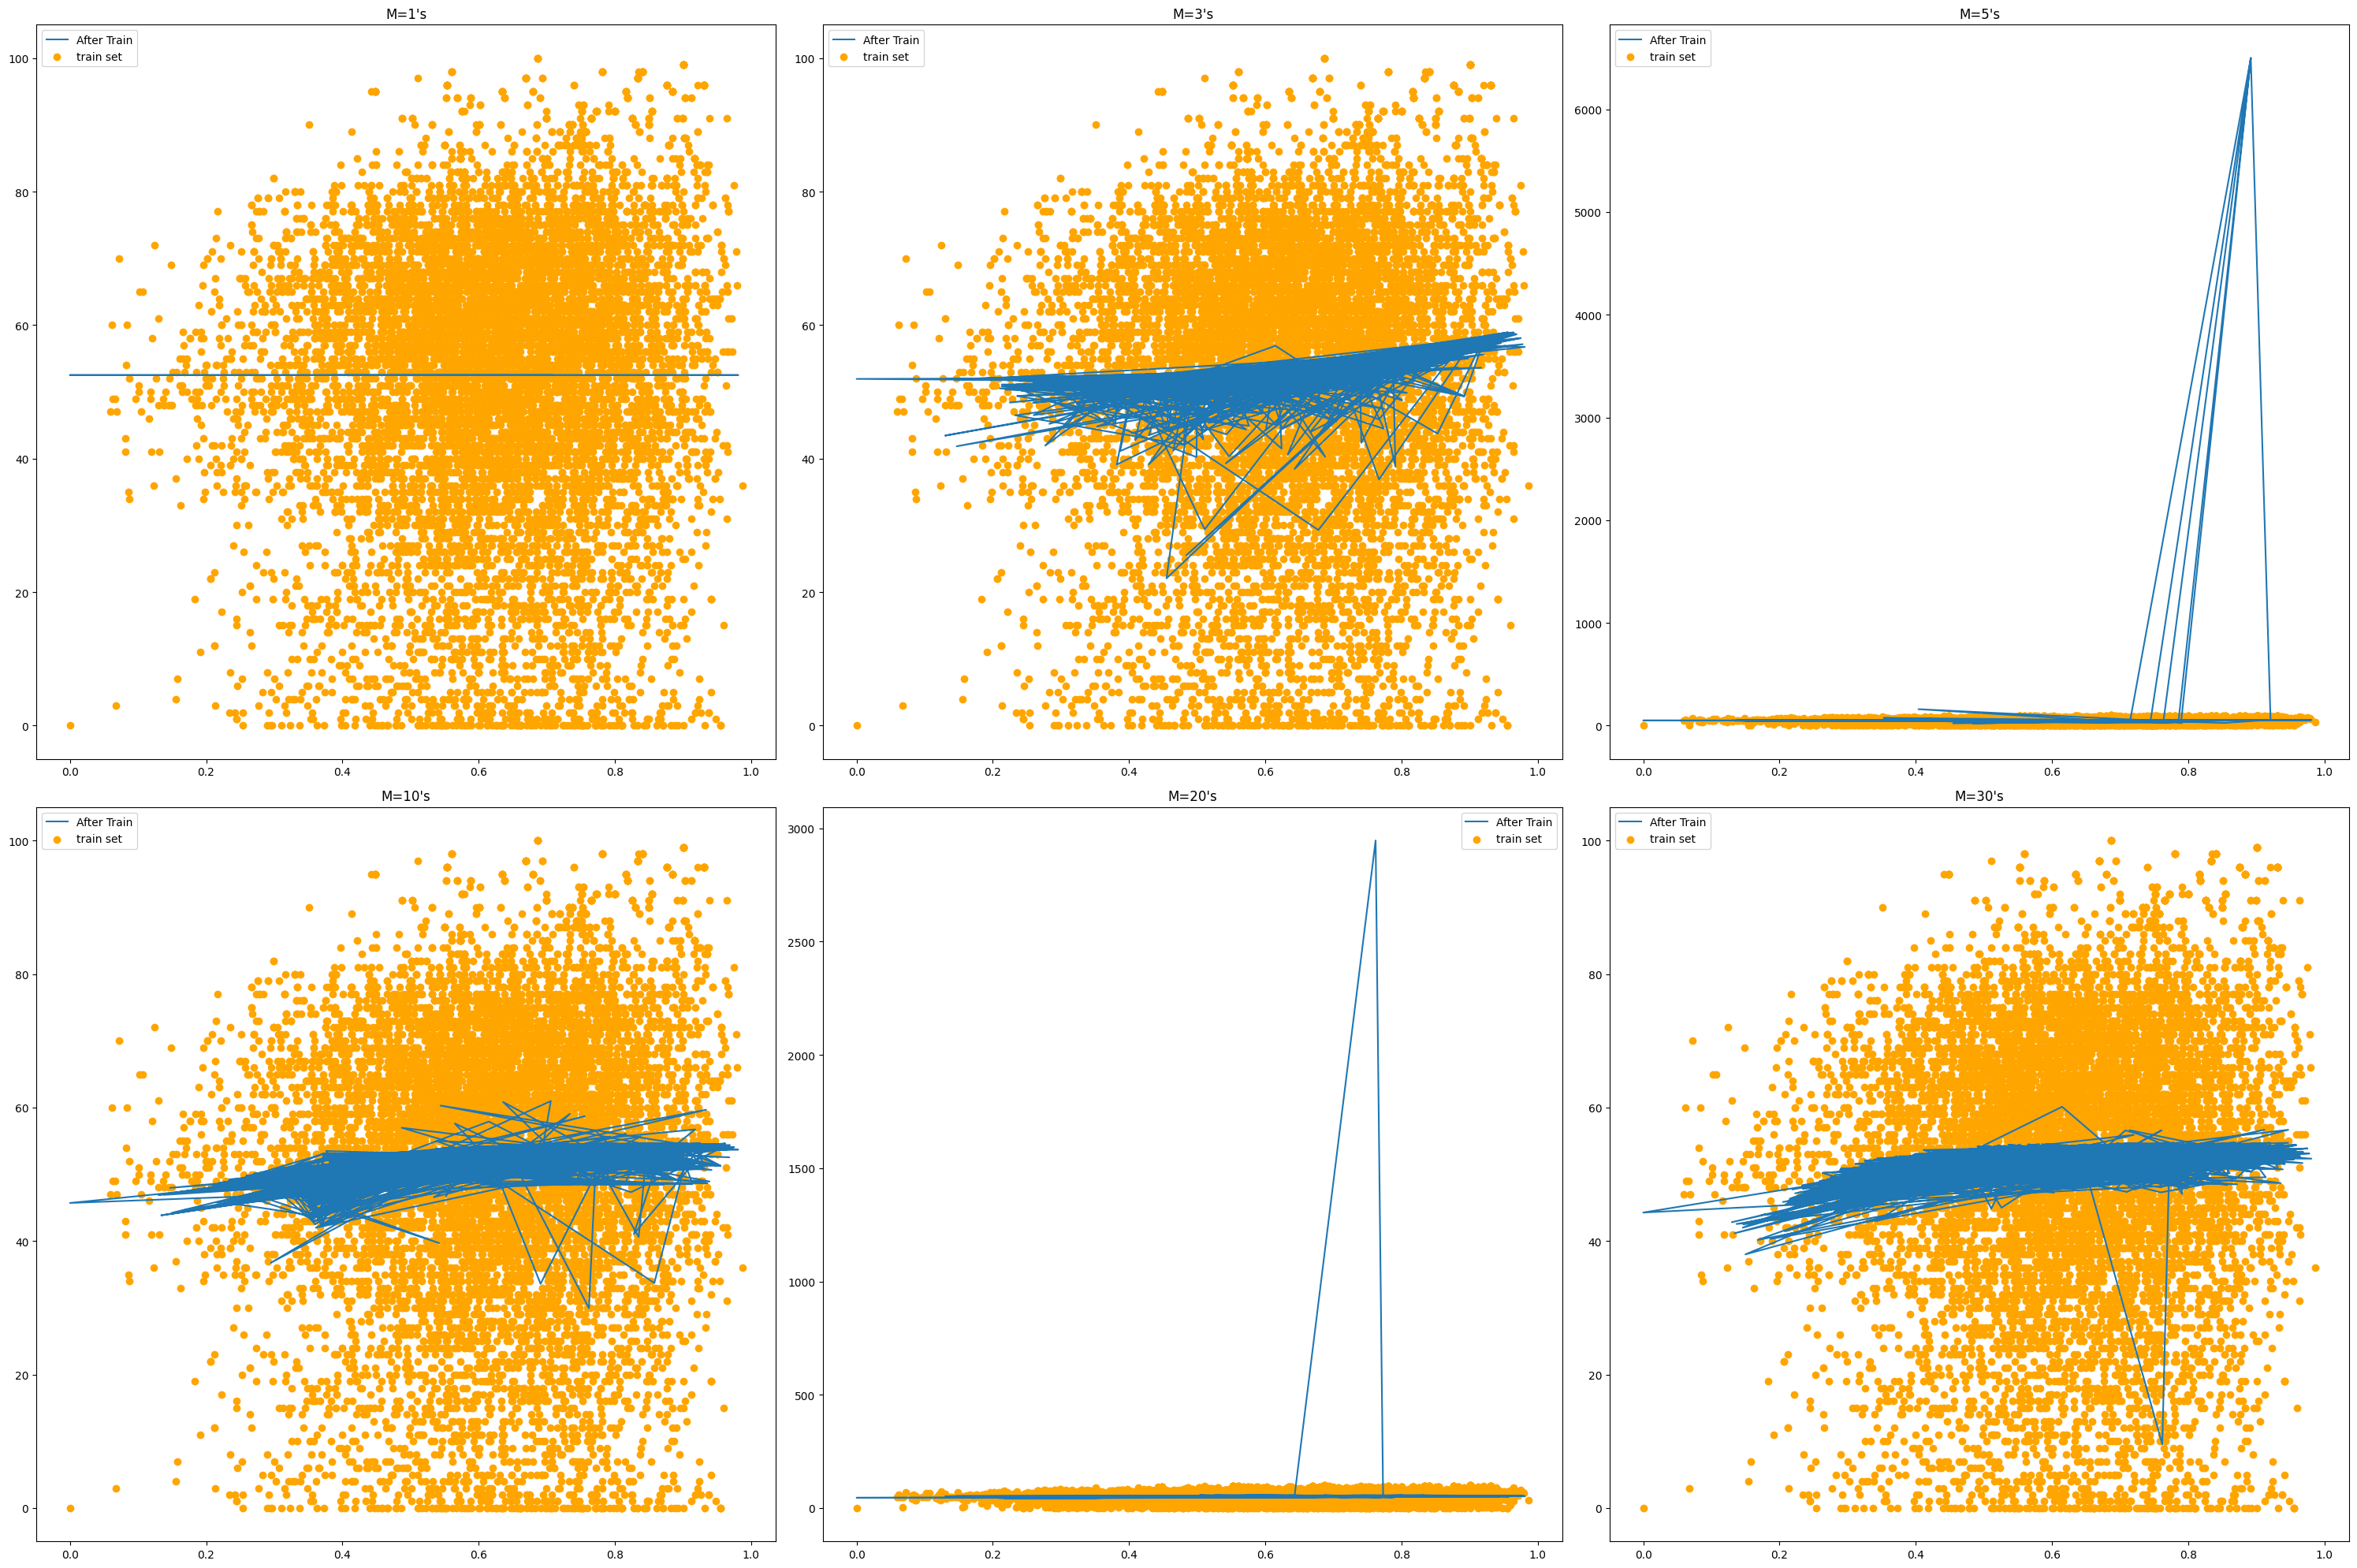

In [45]:
#plt.clf()
#plt.scatter(x_train["danceability"] , y_train , label="train data")
#plt.plot(x_test["danceability"] , y_pre[3] , label="pre data")
#plt.scatter(x_test["danceability"] , y_test , label="true data")
#plt.legend()
#plt.show()

# plot graph (a)
figure, axis = plt.subplots(2, 3, figsize=(30, 20), tight_layout=True)

for index, (m_of_train, predict_result_t) in enumerate(model_result_output_train_dict.items()):
    axis[index//3, index%3].set_title(f"M={m_of_train}'s")

    axis[index // 3, index % 3].plot(x_test["danceability"],
                                     predict_result_t,
                                     label="After Train")

    axis[index//3, index%3].scatter(x_train["danceability"],
                                    y_train,
                                    label="train set",
                                    color="orange")

    axis[index // 3, index % 3].legend()

plt.show()


In [43]:
def accuracy(y_pre : np.ndarray , y_true: np.ndarray) -> float:
    
    y_d = y_true.copy()
    y_d[y_d == 0] = 1
    arr = (y_pre - y_true) / (y_d) 
    
    return np.sum(np.abs(arr)) / len(arr)

In [44]:
for m in M:
    print(accuracy(y_pre[m] , y_test))

KeyError: 1